# Final Project Python Dasar Sanbercode

## Persiapan (Preprocessing)

In [1]:
# Import library untuk persiapan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data beserta deskripsi setiap kolomnya diperoleh dari: https://www.kaggle.com/c/final-project-python-ds-dasar/data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

Target yang akan diprediksi

In [3]:
df_train['price_range'].value_counts()

1000k-<2000k    390
0-<1000k        376
2000k-3000k     375
>3000k          359
Name: price_range, dtype: int64

### Missing Value

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1450 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1381 non-null   float64
 16  lebar_

Dari informasi di atas, terdapat 2 kolom yang bertipe `object`, sehingga kita harus mengubahnya ke dalam bentuk angka dengan cara label encoding.

Namun kita punya masalah lain, yaitu terdapat nilai null pada data latih, pada kolom "panjang_layar" dan "kecepatan_clock". Maka akan kita isi nilai null tersebut terlebih dahulu, dengan metode yang berbeda. Perhatikan informasi di bawah ini.

In [5]:
df_train['panjang_layar'].value_counts()

17.0    147
16.0    113
14.0    109
7.0     106
11.0    100
15.0     99
9.0      96
10.0     95
13.0     94
19.0     92
6.0      91
8.0      89
18.0     87
5.0      63
Name: panjang_layar, dtype: int64

In [6]:
df_train['kecepatan_clock'].value_counts()

0.5    298
2.8     68
2.5     60
2.3     57
0.6     55
2.1     55
1.9     55
2.0     54
1.3     53
0.7     52
1.6     50
2.4     49
2.9     49
1.8     47
1.4     47
1.7     46
2.2     46
1.2     44
1.0     44
0.9     43
2.6     40
2.7     40
0.8     39
1.1     36
3.0     23
Name: kecepatan_clock, dtype: int64

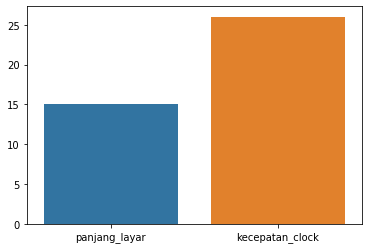

In [7]:
null_1 = len(df_train['panjang_layar'].unique())
null_2 = len(df_train['kecepatan_clock'].unique())
sns.barplot(x=['panjang_layar', 'kecepatan_clock'], y=[null_1, null_2])

Karena kolom 'panjang_layar' memiliki nilai bulat (integer) dan jumlah nilai uniknya tidak terlalu banyak, maka missing value akan diisi oleh modus dari kolom tersebut.

Sedangkan untuk kolom 'kecepatan_clock', karena nilainya tidak bulat dan jumlah uniknya banyak, maka missing value akan diisi oleh nilai rata-rata dari kolom tersebut.

In [8]:
df_train['panjang_layar'].fillna(df_train['panjang_layar'].mode()[0], inplace=True)
df_train['kecepatan_clock'].fillna(df_train['kecepatan_clock'].mean(), inplace=True)

### Label Encoding

Dari informasi sebelumnya, terdapat dua kolom yang bertipe `object`, yaitu kolom 'four_g' dan kolom 'price_range'. Akan kita ubah menjadi integer, dengan menggunakan label encoding. Perlu diperhatikan, untuk 'price_range', kita tidak membutuhkan dummy encoding, karena data bersifat ordinal.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_fourg = LabelEncoder()
df_train['four_g'] = label_fourg.fit_transform(df_train['four_g'])

label_price = LabelEncoder()
df_train['price_range'] = label_price.fit_transform(df_train['price_range'])

### EDA

In [10]:
# Sari numerik dari beberapa kolom
df_train[['daya_baterai', 'memori_internal', 'kapasitas_ram']].describe()

,daya_baterai,memori_internal,kapasitas_ram
count,1500.000000,1500.000000,1500.000000
mean,1233.106667,31.952667,2101.494667
std,441.849570,18.323853,1073.742748
min,501.000000,2.000000,256.000000
25%,840.750000,16.000000,1202.500000
50%,1222.500000,31.000000,2107.000000
75%,1608.500000,48.000000,2982.250000
max,1998.000000,64.000000,3998.000000


Dari statistik di atas, kita tahu bahwa RAM terbesar bernilai sekitar 4GB, dan memori_internal terbesar 64GB. Hal ini menunjukkan bahwa, meskipun terdapat smartphone dengan harga lebih dari 3 juta (>3000k), namun spefisikasinya tidak lebih dari mid-range phone. Ada 2 kemungkinan:
1. Data diambil bertahun-tahun sebelumnya, sehingga spesifikasi mid-range saat ini memiliki harga yang cukup mahal, atau
2. Data diambil baru-baru ini, namun tidak mencatat smartphone berspesifikasi high-end. Artinya, meskipun terdapat label >3000k, harga aslinya tidak akan jauh dari 3jt, mengingat spesifikasinya yang bersifat mid-range.

Saya menduga, yang benar adalah kemungkinan yang pertama. Mari lihat informasi berikut.

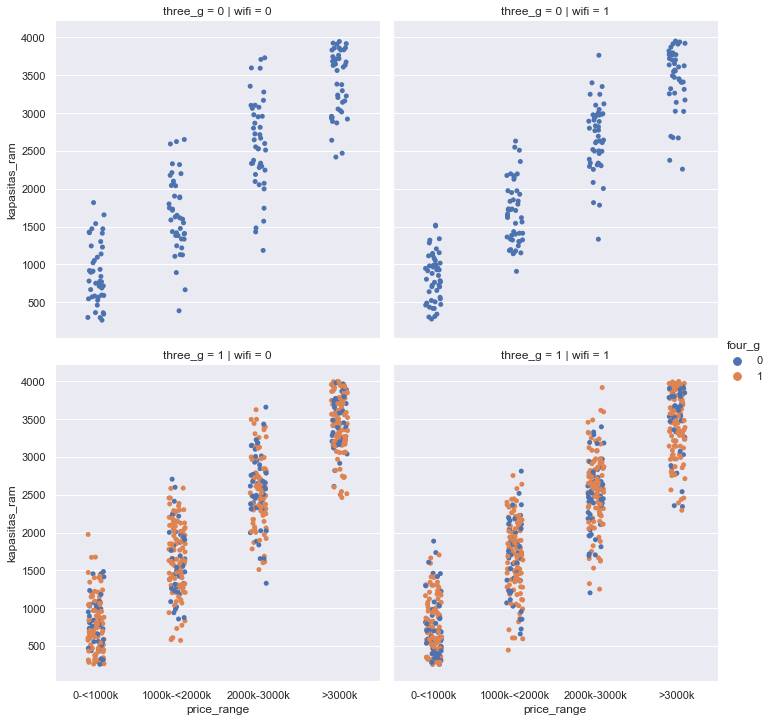

In [11]:
sns.set(rc={'figure.figsize':(13, 8)})
order = ['0-<1000k', '1000k-<2000k', '2000k-3000k', '>3000k']
g = sns.catplot(x="price_range", y="kapasitas_ram", hue="four_g", col='wifi', row='three_g', data=df_train)
g.set(xticklabels=order)
plt.show()

Dari plot di atas, kita dapatkan:
- Pada setiap price range, terdapat perbedaan signifikan dalam kapasitas RAM;
- Pada setiap price range, distribusi smartphone berdasarkan fitur 4G maupun 3G tidak jauh berbeda;
- Pada setiap price range, distribusi smartphone berdasarkan fitur wifi tidak jauh berbeda.

Tiga poin di atas beserta plotnya menunjukkan bahwa:
1. Terdapat smartphone murah yang memiliki fitur 4G dan wifi serta kapasitas RAMnya tinggi, dan
2. terdapat smartphone mahal yang tidak memiliki fitur 4G, 3G dan wifi.

Kedua informasi di atas sebetulnya cukup aneh. Jika kita melihat poin pertama, gatal rasanya untuk menyimpulkan bahwa data diambil baru-baru ini. Namun jika melihat informasi kedua, kita dapat menyimpulkan bahwa data diambil bertahun-tahun sebelumnya, karena begitu banyaknya smartphone mahal yang tidak memiliki fitur 4G, 3G, dan bahkan Wifi.

## Feature Engineering

### Korelasi antar feature

Mari kita lihat korelasi antar feature dengan menggunakan heatmap.

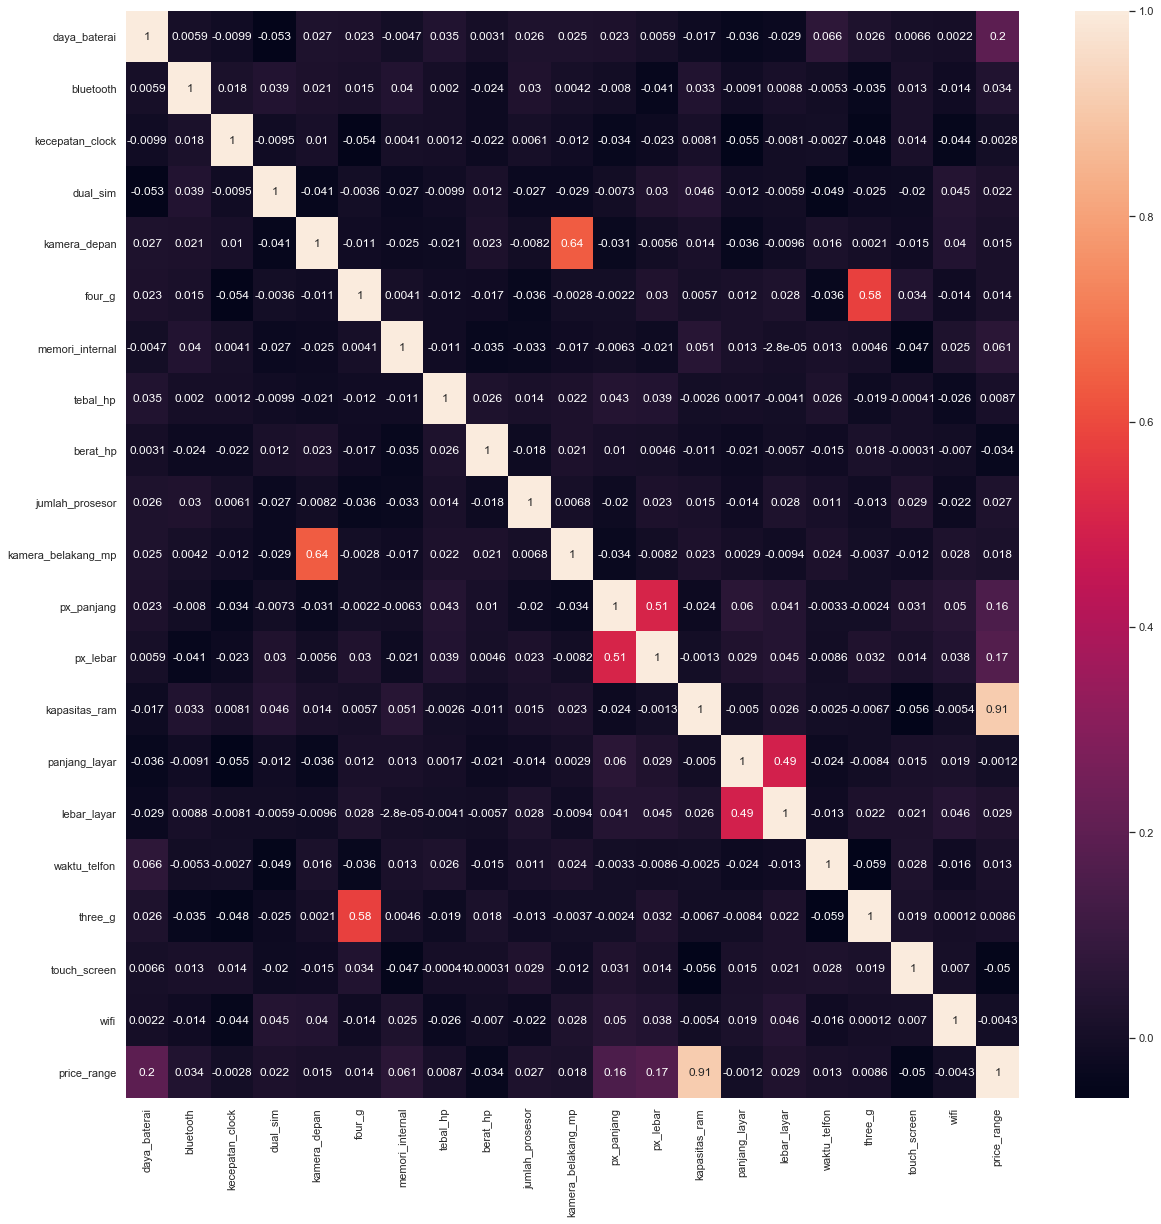

In [12]:
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(df_train.drop('index', axis=1).corr(), annot=True, fmt='.2g')
plt.show()

Heatmap tersebut menunjukkan bahwa terdapat beberapa feature yang cukup berkorelasi dengan price_range: daya_baterai, px_panjang, px_lebar, dan kapasitas_ram. Namun, karena px_panjang dan px_lebar juga saling berkorelasi, maka dapat kita buat kolom baru, px, hasil penjumlahan px_lebar dan px_panjang.

### Menambahkan fitur baru

In [13]:
df_train['px'] = df_train['px_panjang'] + df_train['px_lebar']
df_test['px'] = df_test['px_panjang'] + df_test['px_lebar']

Selanjutnya, akan digunakan RFE untuk memilih feature yang punya pengaruh tinggi terhadap target.

### Feature selection

In [23]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

rfe = RFE(XGBClassifier(n_jobs=-1, random_state=1, use_label_encoder=False))

rfe.fit(df_train.drop(['index', 'price_range'], axis=1), df_train['price_range'])

print('Selected features:')
print(df_train.drop(['index', 'price_range'], axis=1).columns[rfe.support_].tolist())

Selected features:
['daya_baterai', 'dual_sim', 'memori_internal', 'berat_hp', 'jumlah_prosesor', 'px_panjang', 'px_lebar', 'kapasitas_ram', 'waktu_telfon', 'px']


*Note: output mungkin berbeda untuk setiap eksekusinya, karena ketika saya mengirim submission, yang saya dapat seperti di bawah ini, tidak jauh berbeda*

In [15]:
kolom = ['daya_baterai', 'bluetooth', 'memori_internal', 'tebal_hp', 'berat_hp', 'jumlah_prosesor', 'px_panjang', 'px_lebar', 'kapasitas_ram', 'px']
X_train = df_train[kolom]
y_train = df_train['price_range']

X_test = df_test[kolom]

### Feature scaling

Agar feature memiliki distribusi yang serupa, maka akan dilakukan feature scaling sebagai berikut.

In [16]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

## Modeling

Di sini, saya menggunakan SVC untuk model klasifikasi. Selanjutnya, dilakukan Grid Search Cross-Validation untuk mencari hyperparameter terbaik.

Salah satu alasan saya menggunakan SVC adalah hyperparameternya tidak terlalu banyak, cocok untuk device saya yang mempunyai computing power yang kecil

### Hyperparameter tuning

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

model = SVC()
param_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': list(range(1, 20))}
gscv = GridSearchCV(model, param_grid, cv=10, scoring='f1_micro')
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=0)

In [18]:
print("Hyperparameter terbaik:", gscv.best_params_)
print("Score terbaik:", gscv.best_score_)

Hyperparameter terbaik: {'C': 3, 'gamma': 'scale', 'kernel': 'linear'}
Score terbaik: 0.9760000000000002


###  Fitting dan evaluasi

In [19]:
model = gscv.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [20]:
from sklearn.metrics import f1_score
print('Skor f-mean model untuk data training:', f1_score(y_train, y_pred, average='micro'))

Skor f-mean model untuk data training: 0.986


Dari cross-validation, didapat skor terbaik 0.97, dan dari data training, didapat score 0.986. Jadi, model tersebut mungkin saja overfitting terhadap data training, namun tidak terlalu besar. Sehingga masih mampu men-generalisasi data yang belum dilihatnya. Model siap untuk fitting terhadap data test.

## Submisi

In [21]:
y_predict = model.predict(X_test)

In [22]:
submission = pd.DataFrame({'index':df_test['index'], 'price_range':y_predict})
submission.to_csv('Final.csv', index=False)